# 4. Vectorization - process of converting text data into numeric data so that future data analysis and machine learning techniques can be applied

* Most ML techniques require text data to be cleaned, normalized and in a numeric format
* Some techniques, such as sentiment analysis, require text data to be in its raw text form

* Clean, normalized text is turned into a Document-Term Matrix (DTM) for 
vectorization
 * Each row represents a document, and each column represents a term
 * The values within the DTM can be word counts, TF-IDF scores, or other calculated values

* Every value in the count of each term (columns) in each document (rows)

# scikit learn lekcja 45

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=2) 
#language to remove stop words, range for the ssequenc
#  of 'n' words to consider as a term in the DTM examples: (1,1) default, (1,2) "data", "data science", (3,3) "data science workflow"
# min_df number of documents needed to appear

In [39]:
import pandas as pd
text_clean=pd.read_pickle('text_clean.pkl')
text_clean

0                    life lemon lemonade
1                     lemon maven market
2            dozen lemon gallon lemonade
3    lemon lemon lemon lemon lemon lemon
4              s market lemon sale today
5        maven market eureka lemon lemon
6           palmer lemonade half ice tea
7                       ice tea favorite
Name: sentence, dtype: object

In [40]:
cv=CountVectorizer()
dtm=cv.fit_transform(text_clean) #Document-Term Matrix
dtm_df=pd.DataFrame(dtm.toarray(),columns=cv.get_feature_names_out())
dtm_df

,dozen,eureka,favorite,gallon,half,ice,lemon,lemonade,life,market,maven,palmer,sale,tea,today
0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0
2,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1
5,0,1,0,0,0,0,2,0,0,1,1,0,0,0,0
6,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0
7,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [41]:
# 15 terms (columns) across the 8 documents(rows)

In [42]:
cv2=CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=2) #min_df w ilu wierszach musi się znajdować wartość 
dtm=cv2.fit_transform(text_clean) #Document-Term Matrix
dtm_df=pd.DataFrame(dtm.toarray(),columns=cv2.get_feature_names_out())
dtm_df

,ice,ice tea,lemon,lemon lemon,lemonade,market,maven,maven market,tea
0,0,0,1,0,1,0,0,0,0
1,0,0,1,0,0,1,1,1,0
2,0,0,1,0,1,0,0,0,0
3,0,0,6,5,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0
5,0,0,2,1,0,1,1,1,0
6,1,1,0,0,1,0,0,0,1
7,1,1,0,0,0,0,0,0,1


In [43]:
#skróciliśmy do 9 kolumn (terms)

In [44]:
dtm2=cv2.fit_transform(text_clean)
dtm2=pd.DataFrame(dtm2.toarray()) #columns=cv2.get_feature_names_out()
dtm2

,0,1,2,3,4,5,6,7,8
0,0,0,1,0,1,0,0,0,0
1,0,0,1,0,0,1,1,1,0
2,0,0,1,0,1,0,0,0,0
3,0,0,6,5,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0
5,0,0,2,1,0,1,1,1,0
6,1,1,0,0,1,0,0,0,1
7,1,1,0,0,0,0,0,0,1


# 47. lekcja

In [45]:
cv3=CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.2, max_df=0.8) #5 lub 0.8, czyli 80%, ngram - ile wyrazowa fraza, min_df w ilu wierszach musi się znajdować wartość 
dtm3=cv3.fit_transform(text_clean) #Document-Term Matrix
dtm_df3=pd.DataFrame(dtm3.toarray(),columns=cv3.get_feature_names_out())
dtm_df3
#wiersze = dokumenty, doc=rows, terms=columns

,ice,ice tea,lemon,lemon lemon,lemonade,market,maven,maven market,tea
0,0,0,1,0,1,0,0,0,0
1,0,0,1,0,0,1,1,1,0
2,0,0,1,0,1,0,0,0,0
3,0,0,6,5,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0
5,0,0,2,1,0,1,1,1,0
6,1,1,0,0,1,0,0,0,1
7,1,1,0,0,0,0,0,0,1


# Return most common phrases - helpful for finding most common negative words for example, or what words

In [46]:
term_freq=dtm_df3.sum()
term_freq


ice              2
ice tea          2
lemon           12
lemon lemon      6
lemonade         3
market           3
maven            2
maven market     2
tea              2
dtype: int64

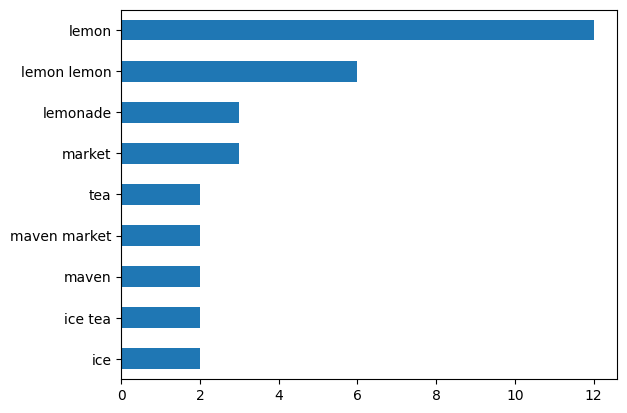

In [47]:
term_freq.sort_values().plot(kind='barh'); 


# 5. TF-IDF -> Team Frequency-Inverse Document Frequency (TF-IDF)

In [48]:
text_clean

0                    life lemon lemonade
1                     lemon maven market
2            dozen lemon gallon lemonade
3    lemon lemon lemon lemon lemon lemon
4              s market lemon sale today
5        maven market eureka lemon lemon
6           palmer lemonade half ice tea
7                       ice tea favorite
Name: sentence, dtype: object

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv=TfidfVectorizer()
tfidf=tv.fit_transform(text_clean)
tfidf_df=pd.DataFrame(tfidf.toarray(),columns=tv.get_feature_names_out())
tfidf_df

,dozen,eureka,favorite,gallon,half,ice,lemon,lemonade,life,market,maven,palmer,sale,tea,today
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.375318,0.543168,0.75107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.411442,0.000000,0.00000,0.595449,0.690041,0.000000,0.000000,0.000000,0.000000
2,0.600547,0.000000,0.000000,0.600547,0.000000,0.000000,0.300100,0.434311,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300100,0.000000,0.00000,0.434311,0.000000,0.000000,0.600547,0.000000,0.600547
5,0.000000,0.556913,0.000000,0.000000,0.000000,0.000000,0.556591,0.000000,0.00000,0.402755,0.466736,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.504577,0.422875,0.000000,0.364907,0.00000,0.000000,0.000000,0.504577,0.000000,0.422875,0.000000
7,0.000000,0.000000,0.644859,0.000000,0.000000,0.540443,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.540443,0.000000


In [50]:
#document term matrix for comparison

In [51]:
dtm_df

,ice,ice tea,lemon,lemon lemon,lemonade,market,maven,maven market,tea
0,0,0,1,0,1,0,0,0,0
1,0,0,1,0,0,1,1,1,0
2,0,0,1,0,1,0,0,0,0
3,0,0,6,5,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0
5,0,0,2,1,0,1,1,1,0
6,1,1,0,0,1,0,0,0,1
7,1,1,0,0,0,0,0,0,1


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv2=TfidfVectorizer(stop_words='english', ngram_range=(1,2),min_df=2)
tfidf2=tv2.fit_transform(text_clean)
tfidf_df2=pd.DataFrame(tfidf2.toarray(),columns=tv2.get_feature_names_out())
tfidf_df2

,ice,ice tea,lemon,lemon lemon,lemonade,market,maven,maven market,tea
0,0.000000,0.000000,0.568471,0.000000,0.822704,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.338644,0.000000,0.000000,0.490093,0.567948,0.567948,0.000000
2,0.000000,0.000000,0.568471,0.000000,0.822704,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.581897,0.813262,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.568471,0.000000,0.000000,0.822704,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.524634,0.439939,0.000000,0.379631,0.439939,0.439939,0.000000
6,0.516768,0.516768,0.000000,0.000000,0.445928,0.000000,0.000000,0.000000,0.516768
7,0.577350,0.577350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.577350
